In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
#Create dummy variables
geography=pd.get_dummies(df["Geography"],dtype=int)
gender=pd.get_dummies(df['Gender'],dtype=int)

In [7]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [8]:
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [9]:
## Concatenate the Data Frames
df=pd.concat([df,geography,gender],axis=1)

## Drop Unnecessary columns
df=df.drop(['Geography','Gender'],axis=1)

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

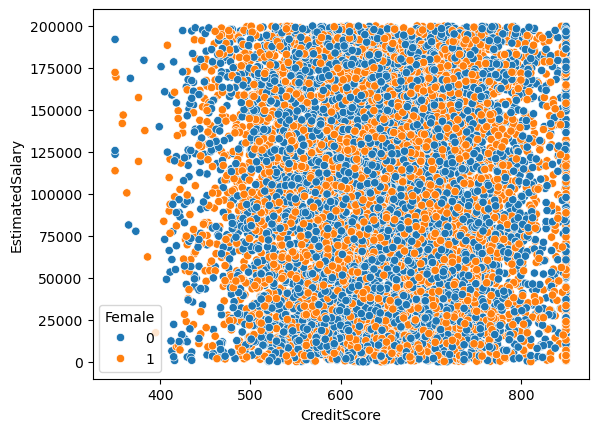

In [11]:
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary",hue='Female')

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

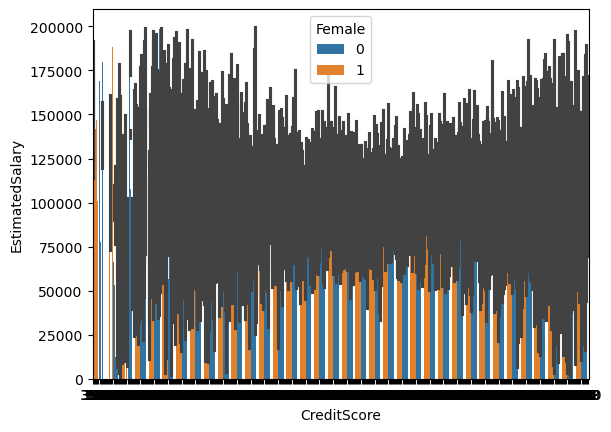

In [12]:
sns.barplot(data=df,x='CreditScore',y='EstimatedSalary',hue="Female")

<Axes: xlabel='Exited', ylabel='CreditScore'>

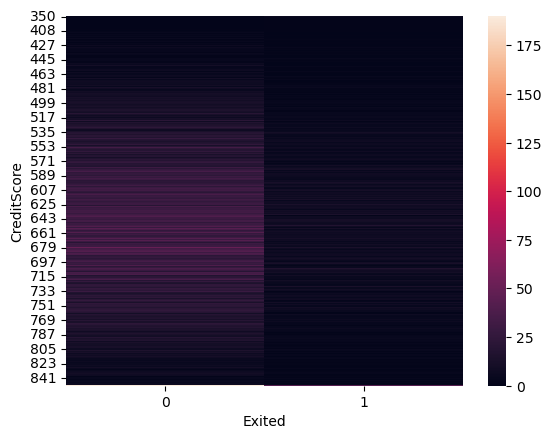

In [13]:
sns.heatmap(pd.crosstab(df["CreditScore"],df["Exited"]))

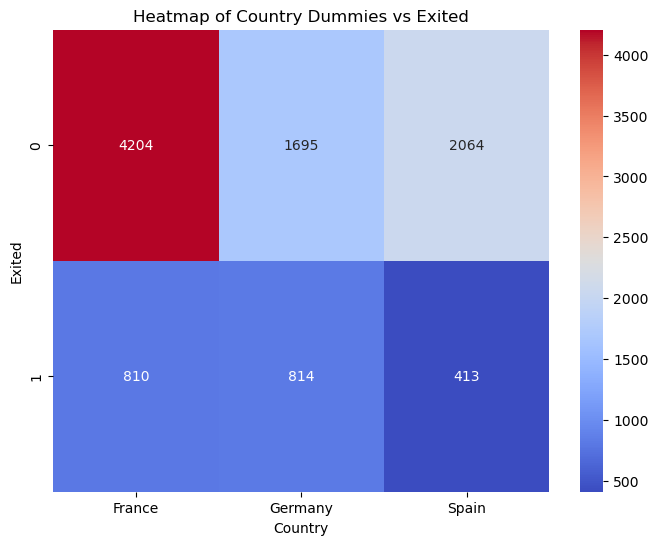

In [14]:
grouped_data = df[['France', 'Germany', 'Spain', 'Exited']].groupby('Exited').sum()

# Visualize the data using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Country Dummies vs Exited')
plt.xlabel('Country')
plt.ylabel('Exited')
plt.show()

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   
France             -0.008928 -0.039208 -0.002848 -0.231329       0.001230   
Germany             0.005538  0.046897 -0.000567  0.401110      -0.010419   
Spain               0.004780 -0.001685  0.003868 -0.134892       0.009039   

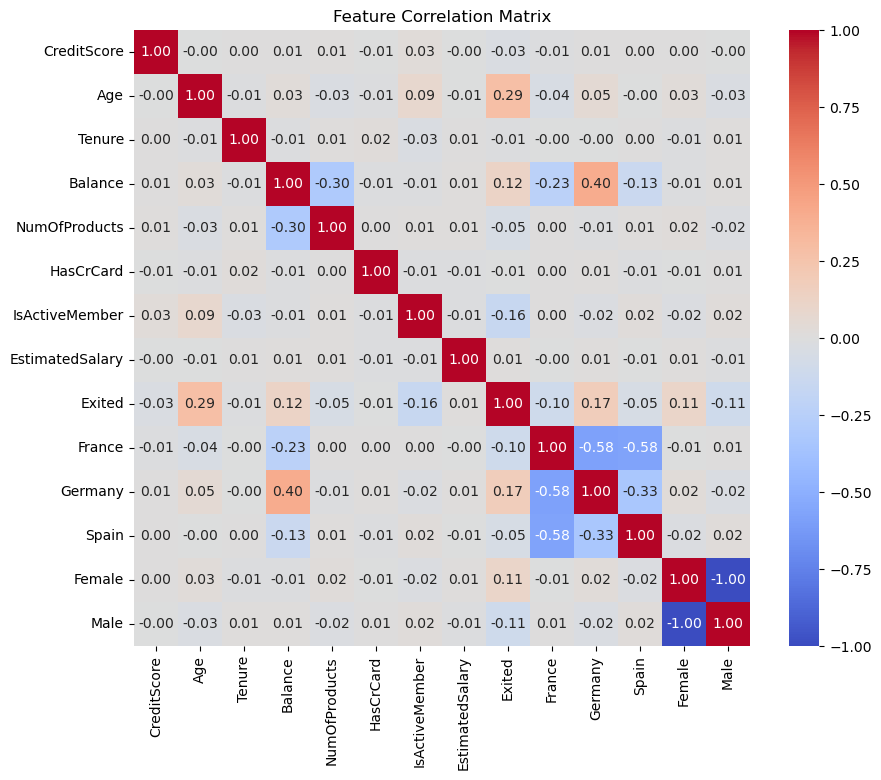

In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation values
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Feature Correlation Matrix')
plt.show()

<Axes: ylabel='CreditScore'>

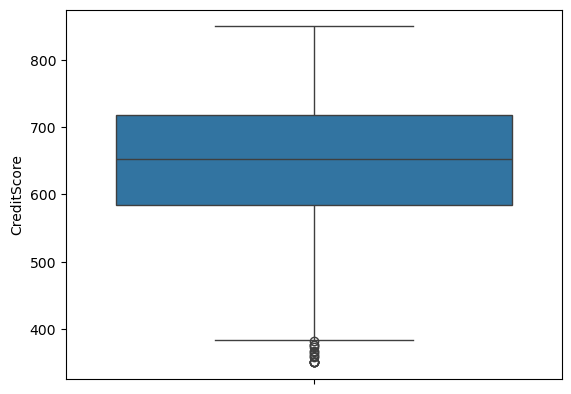

In [16]:
sns.boxplot(df['CreditScore'])

In [17]:
# Calculate Q1, Q3, and IQR
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
        
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['CreditScore'].clip(lower=lower_bound, upper=upper_bound, inplace=True)

C:\Users\itsri\AppData\Local\Temp\ipykernel_13328\2203906414.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CreditScore'].clip(lower=lower_bound, upper=upper_bound, inplace=True)


<Axes: ylabel='Age'>

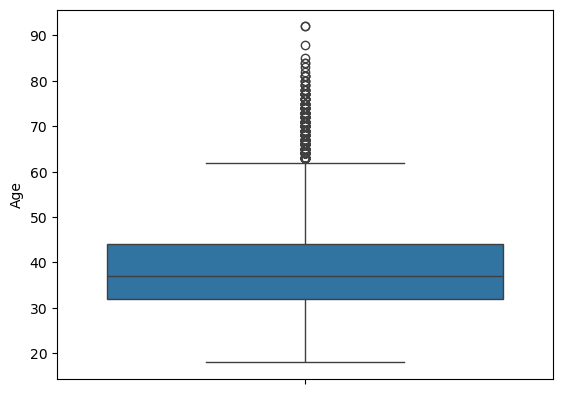

In [18]:
sns.boxplot(df['Age'])

In [19]:
# Calculate Q1, Q3, and IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
        
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Age']=df['Age'].clip(lower=lower_bound, upper=upper_bound)

<Axes: ylabel='Tenure'>

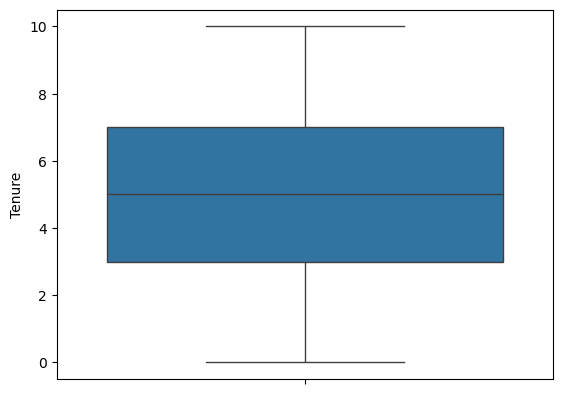

In [20]:
sns.boxplot(df['Tenure'])

<Axes: ylabel='Balance'>

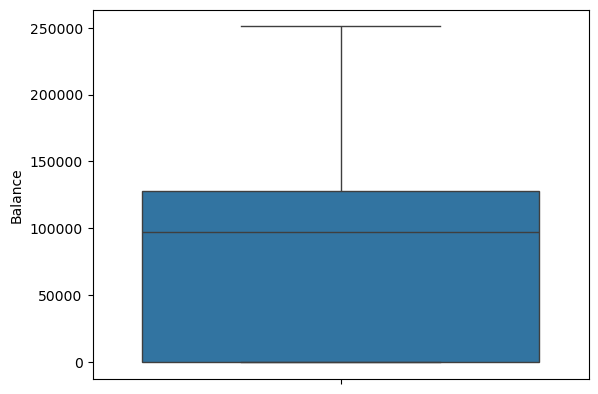

In [21]:
# NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary
sns.boxplot(df['Balance'])

<Axes: xlabel='Balance', ylabel='Density'>

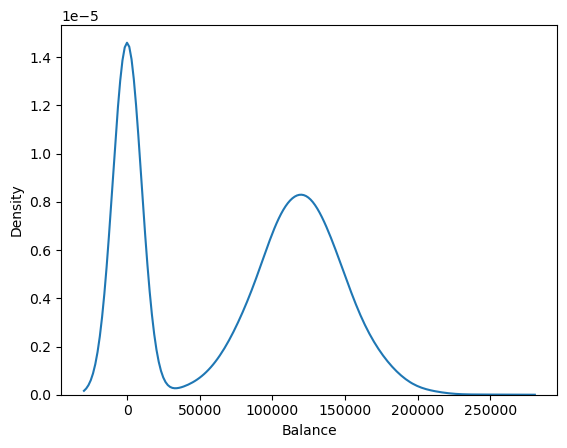

In [22]:
sns.kdeplot(data=df,x='Balance')

<Axes: ylabel='EstimatedSalary'>

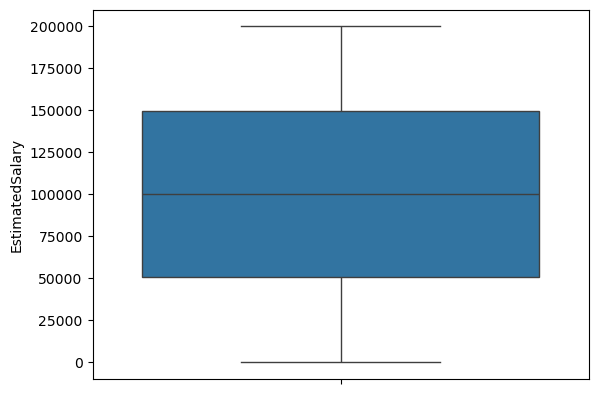

In [23]:
sns.boxplot(df['EstimatedSalary'])

In [24]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
France             0
Germany            0
Spain              0
Female             0
Male               0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   France           10000 non-null  int32  
 10  Germany          10000 non-null  int32  
 11  Spain            10000 non-null  int32  
 12  Female           10000 non-null  int32  
 13  Male             10000 non-null  int32  
dtypes: float64(2), int32(5), int64(7)
memory usage: 898.6 KB


In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1),df['Exited'], test_size = 0.2, random_state = 0)

In [28]:
X_train.shape , y_train.shape

((8000, 13), (8000,))

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[ 0.16938069, -0.4729051 ,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30760534,  0.34893557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19296163, -0.98655551, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.90215573, -0.37017501,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62531899, -0.06198476,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28473341,  0.96531607, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [31]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [32]:
# Initialising the ANN
classifier = Sequential()

In [33]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=13))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

C:\Users\itsri\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['acc'])

In [35]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4444 - loss: 0.7622 - val_acc: 0.7808 - val_loss: 0.5507
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8012 - loss: 0.5223 - val_acc: 0.7952 - val_loss: 0.4978
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7926 - loss: 0.4944 - val_acc: 0.7955 - val_loss: 0.4807
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7958 - loss: 0.4725 - val_acc: 0.7955 - val_loss: 0.4709
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7931 - loss: 0.4665 - val_acc: 0.7955 - val_loss: 0.4628
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7987 - loss: 0.4490 - val_acc: 0.7955 - val_loss: 0.4556
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8008 - loss: 0.4357 - val_acc: 0.7959 - val_loss: 0.4490
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8064 - loss: 0.4256 - val_acc: 0.7997 - val_loss: 0.4432
Epoch 9/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


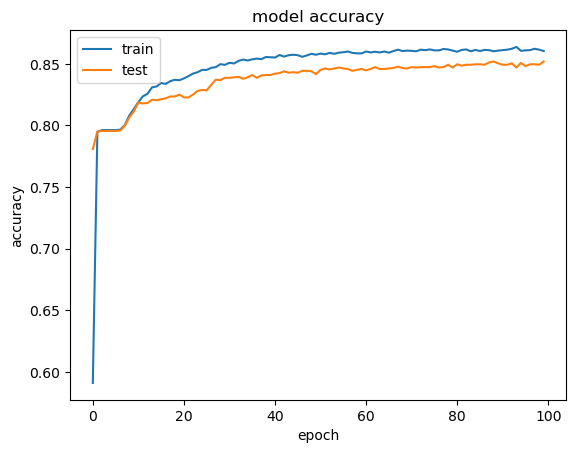

In [36]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

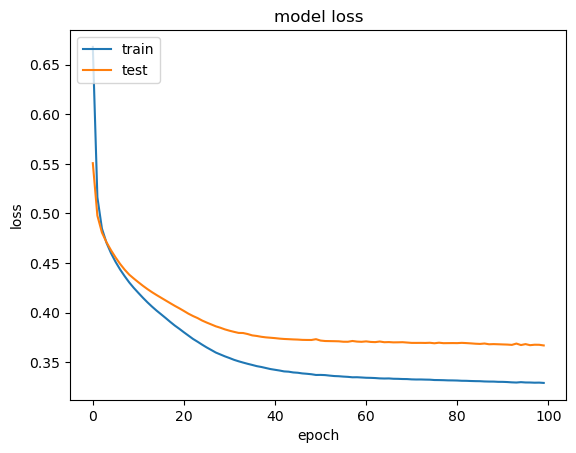

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 208,  197]], dtype=int64)

In [40]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8615